In [1]:
import matplotlib.pyplot as plt
from PIL import Image

from pycocotools.coco import COCO
from pycocotools.mask import decode

In [2]:
# Put your SUNRGBD root directory here
dataset_root = ''

# Demo for how to use coco formatted SUNRGBD data

## Loading json files using pycocotools

In [3]:
sunrgbd = COCO('instances_val.json')

loading annotations into memory...
Done (t=0.83s)
creating index...
index created!


If you run into an encoding error, use the following snippet to re-encode the json file 

In [33]:
with open('instances_val.json', 'r', encoding='iso-8859-1') as f:
    jsonstr = f.read()

with open('instances_val.json', 'w') as f:
    f.write(jsonstr)

## Categories

The first 38 categories correspond to the seg37list plus an unknown label 

In [4]:
for x in range(38):
    print(sunrgbd.cats[x]['name'])

unknown
wall
floor
cabinet
bed
chair
sofa
table
door
window
bookshelf
picture
counter
blinds
desk
shelves
curtain
dresser
pillow
mirror
floor mat
clothes
ceiling
books
fridge
tv
paper
towel
shower curtain
box
whiteboard
person
nightstand
toilet
sink
lamp
bathtub
bag


In the seglistall labels, the categories are very noisy with numerous misspellings. I used a spellcheck to correct many of these misspellings. The correspondance between the original labels and the clean label is present in the fields 'seglist_all_name' and 'seglist_all_id'.

In [5]:
for x in sunrgbd.getCatIds('bookshelf'):
    print(sunrgbd.cats[x])

{'supercategory': 'bookshelf', 'id': 10, 'name': 'bookshelf', 'seglist_all_name': ['bookshelf', 'bookshelve', 'black_book_shelf'], 'seglist_all_id': [477, 478, 371]}
{'supercategory': 'books', 'id': 23, 'name': 'books', 'seglist_all_name': ['books', 'boks', 'bookes', 'ooks'], 'seglist_all_id': [476, 447, 471, 3639]}
{'supercategory': 'shelf', 'id': 38, 'name': 'shelf', 'seglist_all_name': ['shelf', 'shalf', 'top_with_shelf_with_door', "shelf'", 'shlef', 'wood_self', 'wood_shhelf', 'steel_self', 'shefl', 'shelr'], 'seglist_all_id': [4809, 4778, 5667, 4811, 4838, 6435, 6437, 5201, 4807, -1]}
{'supercategory': 'book', 'id': 63, 'name': 'book', 'seglist_all_name': ['book', "book'", 'ook', 'white_an_dblack_book', 'white_book'], 'seglist_all_id': [452, 454, 3637, 6258, 6263]}
{'supercategory': 'boo', 'id': 1785, 'name': 'boo', 'seglist_all_name': ['boo'], 'seglist_all_id': 451}


## Images

In [6]:
imgIDs = sunrgbd.getImgIds(catIds=[10]) # Get all bookshelf images
print("Number of images containing bookshelf: {}".format(len(imgIDs)))
print(sunrgbd.imgs[imgIDs[0]])

Number of images containing bookshelf: 150
{'file_name': 'SUNRGBD/kv1/NYUdata/NYU0345/image/NYU0345.jpg', 'depth_file_name': 'SUNRGBD/kv1/NYUdata/NYU0345/depth/NYU0345.png', 'height': 427, 'width': 561, 'id': 7180, 'split': 'val'}


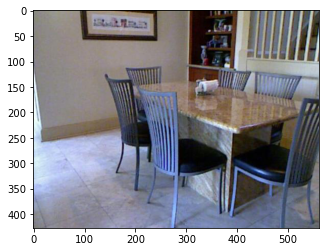

In [7]:
I = Image.open(dataset_root + sunrgbd.imgs[imgIDs[0]]['file_name'])
plt.imshow(I)
plt.show()

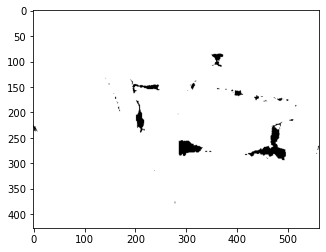

In [8]:
D = Image.open(dataset_root + sunrgbd.imgs[imgIDs[0]]['depth_file_name']) # SUNRGBD also includes a depth image
plt.imshow(D)
plt.show()

## Annotations

There are two types of annotations in SUNRGBD, bounding boxes and instance segmentation. Bounding box annotations are in `SUNRGBDMeta2DBB.groundtruth2DBB`. Instance segmentations are in the directory structure in `seg.mat` files for each image. They are not one-to-one. There are bounding boxes which have no corresponding segment in `seg.mat` and segments that have no corresponding bounding box in `SUNRGBDMeta2DBB.groundtruth2DBB `. Therefore, both are included in the json.

Let's find the chair annotations in this image.

In [20]:
annId = sunrgbd.getAnnIds(imgIds=imgIDs[0], catIds=5) # Get the chair (catIds=5) annotation for image 10

The first annotation in the list is a instance segmentation. We can tell because the annotation id is in the form `<image_id>_<segment_id>_<instance_id>_seg`. 

The ids in this template refer to the indexes in the seg.mat file for image `image_id`. seg.mat contains a struct object with three fields `seg.names`, `seg.seglabel` and `seg.seginstances`. `segment_id` refers to the annotation value in `seg.seglabel`. `instance_id` refers to the value in `seg.seginstances`. 

Some seg.mat files do not include `seg.seginstances`. In this case, `instance_id=0`

This annotation id is: 7180_5_1_seg


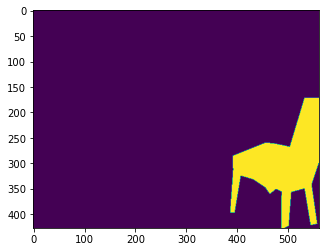

In [21]:
print("This annotation id is: {}".format(sunrgbd.anns[annId[0]]['id']))
mask = decode(sunrgbd.anns[annId[0]]['segmentation']) # Decode the RLE encoding
plt.imshow(mask)
plt.show()

The sixth annotation in the list is a bounding box annotation. We can tell because the annotation id is in the form `<image_id>_<bbox_id>`. 

The `bbox_id` in this template refers to the indexes in `SUNRGBDMeta2DBB.groundtruth2DBB`.  

This annotation id is: 7180_1


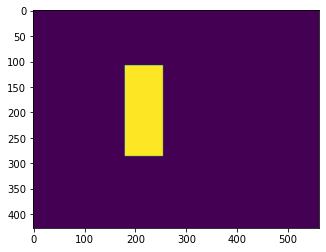

In [22]:
print("This annotation id is: {}".format(sunrgbd.anns[annId[6]]['id']))

mask = decode(sunrgbd.anns[annId[6]]['segmentation']) # Decode the RLE encoding
plt.imshow(mask)
plt.show()